In [159]:
import sympy as sp
from sympy import *
from matplotlib import pyplot as plt
from sympy.plotting import plot3d
import numpy as np
from IPython.display import display, Latex
from sympy import init_printing

# grid coordinates
x, y = symbols('x y')


In [165]:
# analytical solutions
def u_smooth_homogeneous(x, y):
    return sin(pi*(x+1)/2)*sin(pi*(y+1)/2)
u_vec = Matrix([[u_smooth_homogeneous(x,y)],[u_smooth_homogeneous(x,y)]])
#u_vec = Matrix([[1*x*x + 2*y],[3*x +4*y*y]])

def p_polynomial(x,y):
    return x * y  


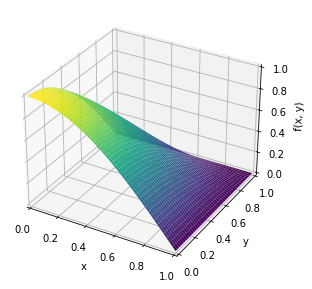

In [166]:
plot3d(u_smooth_homogeneous(x,y), (x, 0, 1), (y, 0, 1));

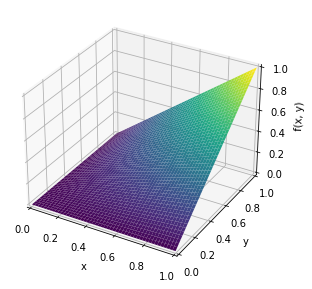

In [167]:
plot3d(p_polynomial(x,y), (x, 0, 1), (y, 0, 1));

In [168]:
# Calculates the symmetric gradient for a vectorial shape function
def epsilon(f):
    gradient = sp.Matrix([[f[0].diff(x), f[0].diff(y)],
                     [f[1].diff(x), f[1].diff(y)]])
   # print(gradient)
   # print(sp.transpose(gradient))
    return 0.5*(gradient + sp.transpose(gradient))

# calculates the divergence of a matrix rowwise in 2D
def div_vecwise(f):
    return Matrix([[f[0,0].diff(x) + f[0,1].diff(y)],[f[1,0].diff(x) + f[1,1].diff(y)]])

# calculates the divergence of a vector in 2D
def div(f):
    return f[0].diff(x) + f[1].diff(y)

# calculates the gradient of a scalarfield in 2D
def grad(f):
    return sp.Matrix([[f.diff(x)],[f.diff(y)]])

# applies the stokes operator with symmetric gradient to obtain rhs
def stokes_operator(u,p):
    rhs_u = -2*div_vecwise(epsilon(u)) + grad(p)
    rhs_p = div(u)
   #print(rhs_u)
   # print(rhs_p)
    return sp.Matrix([[rhs_u[0],rhs_u[1],rhs_p]])

In [169]:
#print(u_vec)
#print(epsilon(u_vec))

#print(div_vecwise(epsilon(u_vec)))
#print(div(u_vec))


rhs = stokes_operator(u_vec,p_polynomial(x,y))   
print(rhs)

Matrix([[y + 0.75*pi**2*sin(pi*(x/2 + 1/2))*sin(pi*(y/2 + 1/2)) - 0.25*pi**2*cos(pi*(x/2 + 1/2))*cos(pi*(y/2 + 1/2)), x + 0.75*pi**2*sin(pi*(x/2 + 1/2))*sin(pi*(y/2 + 1/2)) - 0.25*pi**2*cos(pi*(x/2 + 1/2))*cos(pi*(y/2 + 1/2)), pi*sin(pi*(x/2 + 1/2))*cos(pi*(y/2 + 1/2))/2 + pi*sin(pi*(y/2 + 1/2))*cos(pi*(x/2 + 1/2))/2]])


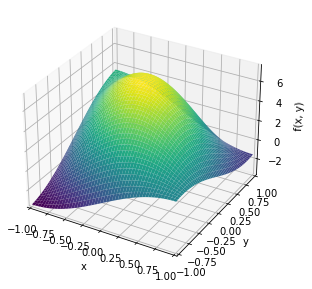

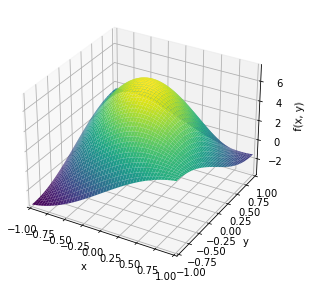

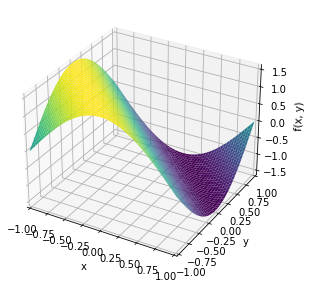

In [143]:
plot3d(rhs[0], (x, 0, 1), (y, 0, 1));
plot3d(rhs[1], (x, 0, 1), (y, 0, 1));
plot3d(rhs[2], (x, 0, 1), (y, 0, 1));